# __Predicting Burned Calories on Workout__


<p align="center">
  <img src="https://github.com/rymyf/Predict_Calories_Regression/blob/main/pics/rock-art-craft-wellness.jpg?raw=true" alt="Material Bread logo">
</p>


## __Contents:__
> 1. Overview
> 2. Installation
> 3. Read the dataset
> 4. Explore Information
> 5. Cleaning the dataset
>> 1. Handling whitespaces
>> 2. Handling the Missing Values
>> 3. Handling the Outliers
>> 4. Export the cleaned dataset
> 6. Explore Data Analysis
>> 1. Questions & Answers


---


## __Overview:__

In this project we take the dataset from kaggle [here](https://www.kaggle.com/emdemor/predicting-burned-calories-on-workout/data)


---

## __Installation:__

In [163]:
# !pip install plotly_express
# !pip install seaborn

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

---

## __Read the Dataset:__

In [165]:
# Import Calories Dataset
df_cal = pd.read_csv('data/calories.csv')

# Import Exercises Dataset
df_ex  = pd.read_csv('data/exercise.csv')

# Merging Datasets
df = pd.merge(df_ex, df_cal, on = 'User_ID')
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68  190.00   94.00     29.00      105.00      40.80   
1  14861698  female   20  166.00   60.00     14.00       94.00      40.30   
2  11179863    male   69  179.00   79.00      5.00       88.00      38.70   
3  16180408  female   34  179.00   71.00     13.00      100.00      40.50   
4  17771927  female   27  154.00   58.00     10.00       81.00      39.80   

   Calories  
0    231.00  
1     66.00  
2     26.00  
3     71.00  
4     35.00

---

## __Explore Information:__

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [167]:
df.describe()

User_ID      Age   Height   Weight  Duration  Heart_Rate  Body_Temp  \
count    15000.00 15000.00 15000.00 15000.00  15000.00    15000.00   15000.00   
mean  14977358.54    42.79   174.47    74.97     15.53       95.52      40.03   
std    2872851.45    16.98    14.26    15.04      8.32        9.58       0.78   
min   10001159.00    20.00   123.00    36.00      1.00       67.00      37.10   
25%   12474190.75    28.00   164.00    63.00      8.00       88.00      39.60   
50%   14997285.00    39.00   175.00    74.00     16.00       96.00      40.20   
75%   17449278.75    56.00   185.00    87.00     23.00      103.00      40.60   
max   19999647.00    79.00   222.00   132.00     30.00      128.00      41.50   

       Calories  
count  15000.00  
mean      89.54  
std       62.46  
min        1.00  
25%       35.00  
50%       79.00  
75%      138.00  
max      314.00

In [168]:
df.size

135000

In [169]:
df.shape

(15000, 9)

In [170]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [171]:
df.dtypes

User_ID         int64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [172]:
df.Gender.value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [173]:
df.Age.nunique()

60

In [174]:
df.Age.unique()

array([68, 20, 69, 34, 27, 36, 33, 41, 60, 26, 21, 66, 32, 53, 39, 46, 50,
       67, 31, 48, 29, 42, 62, 38, 25, 24, 22, 74, 70, 44, 61, 63, 54, 47,
       35, 28, 77, 64, 45, 57, 49, 40, 55, 23, 43, 52, 79, 51, 59, 30, 37,
       56, 58, 78, 73, 76, 72, 65, 71, 75])

In [175]:
df.Age.value_counts()

20    512
21    497
22    489
26    452
25    435
24    426
23    411
27    396
28    390
29    379
32    370
31    339
35    327
30    325
33    320
38    311
34    285
37    283
36    279
39    276
40    260
44    259
42    257
41    252
43    250
46    233
45    233
52    225
47    223
50    220
48    219
54    217
49    208
55    204
53    201
59    198
51    197
56    190
63    182
58    182
61    181
62    180
57    177
64    176
60    172
65    169
73    167
71    163
67    162
70    154
68    150
66    147
79    147
69    145
74    142
76    139
72    137
78    133
77    130
75    117
Name: Age, dtype: int64

In [176]:
df.sample(60)

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
225    10315558    male   31  186.00   85.00     28.00      106.00      40.80   
8208   12887644  female   54  159.00   65.00     22.00      102.00      40.60   
5385   15733989  female   25  174.00   66.00      4.00       82.00      39.10   
4505   13957815  female   56  150.00   51.00      6.00       88.00      39.30   
3283   13435615    male   27  180.00   78.00     25.00      103.00      40.30   
2976   10855360    male   26  211.00  113.00     15.00      103.00      40.10   
14013  10562393  female   54  157.00   51.00      2.00       74.00      38.10   
4647   11823837  female   58  169.00   72.00      6.00       89.00      39.10   
7757   15305860  female   30  163.00   60.00     30.00      112.00      41.20   
3405   18975061    male   67  174.00   74.00     12.00       92.00      40.00   
6590   16287991  female   74  168.00   66.00      4.00       79.00      38.90   
5859   16826603    male   23  173.00   77.00     16.00      102.00      40.10   
10661  15811479  female   23  167.00   69.00     23.00      100.00      40.80   
9542   12640980    male   52  211.00  111.00      4.00       90.00      39.10   
8968   13134028    male   20  193.00   98.00      5.00       88.00      39.20   
9341   12356410    male   33  201.00  105.00     27.00      103.00      40.90   
3173   16415225  female   30  173.00   65.00     22.00      107.00      40.40   
12475  13784553    male   48  190.00   83.00     11.00       99.00      39.80   
3277   10428208  female   48  175.00   70.00     14.00       99.00      40.10   
2287   12337351    male   57  171.00   78.00     14.00       85.00      40.00   
1211   16535331    male   59  179.00   85.00      7.00       85.00      39.30   
7993   13447011  female   45  164.00   64.00     17.00       92.00      40.30   
13059  11278266    male   49  185.00   90.00     29.00       92.00      40.80   
13407  10567102    male   31  188.00   85.00     18.00       93.00      40.50   
9588   18022537  female   39  160.00   58.00     24.00      105.00      40.50   
11825  15963255    male   26  192.00   93.00     13.00       92.00      40.10   
7474   11547074    male   37  189.00   94.00      3.00       91.00      38.70   
7994   18400602  female   69  160.00   61.00      2.00       81.00      38.40   
4046   15527192    male   67  178.00   80.00     15.00       87.00      40.60   
7777   13184083    male   41  207.00  110.00     29.00      113.00      41.10   
14640  14619862    male   40  201.00  109.00      3.00       87.00      38.40   
14584  18003086    male   75  194.00  101.00     19.00       94.00      41.00   
4908   14134398  female   21  174.00   66.00      9.00       94.00      39.80   
13062  12769972  female   44  164.00   66.00     23.00      103.00      40.50   
1842   19653174    male   60  194.00  101.00     13.00       92.00      39.70   
7180   11867274  female   39  167.00   72.00     20.00       96.00      40.60   
10645  10351962    male   63  191.00   93.00     18.00       93.00      40.30   
3579   10407316  female   26  144.00   52.00     11.00       96.00      39.80   
8041   11254410  female   51  166.00   61.00     16.00       99.00      40.40   
1654   19119756  female   36  157.00   54.00     26.00      105.00      40.60   
3073   12734129    male   29  203.00  100.00     22.00      105.00      40.70   
8056   13815980  female   67  146.00   53.00     13.00       90.00      40.30   
14144  14879846    male   21  180.00   83.00     23.00       99.00      40.60   
1379   15269624    male   54  191.00   88.00     23.00      113.00      40.20   
12904  16240769  female   48  166.00   65.00     12.00       97.00      40.20   
2780   16263802    male   56  194.00   97.00     11.00       84.00      40.00   
9735   14406213    male   42  182.00   78.00     20.00       95.00      40.60   
7571   12655008    male   21  182.00   85.00     15.00       93.00      40.60   
8831   12278963    male   40  204.00  1

---

## __Cleaning the Dataset:__

### Handling whitespaces:

In [177]:
# strip whitespaces in columns
df.columns.str.strip()

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [178]:
# strip whitespaces in values of multiple columns
df['Gender'] = df['Gender'].apply(lambda x: x.strip())

### Handling the Missing Values:

In [179]:
# Check for null values
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [180]:
# Find Outliers

### Standaraized Floats

In [181]:
pd.set_option('display.float_format' ,lambda x:'%.2f' % x)

### Export the cleaned dataset:

In [182]:
df.to_csv("cleaned_exer_cal_dataset.csv")

## __Explore Data Analysis:__

### Questions & Answers:

#### 1. How can age affect performance time during a workout?

In [183]:
# Code
grouped_dur = df.groupby(['Age'] )[['Duration']].count().sort_values(ascending = False , by ='Duration')
grouped_dur

Duration
Age          
20        512
21        497
22        489
26        452
25        435
24        426
23        411
27        396
28        390
29        379
32        370
31        339
35        327
30        325
33        320
38        311
34        285
37        283
36        279
39        276
40        260
44        259
42        257
41        252
43        250
45        233
46        233
52        225
47        223
50        220
48        219
54        217
49        208
55        204
53        201
59        198
51        197
56        190
58        182
63        182
61        181
62        180
57        177
64        176
60        172
65        169
73        167
71        163
67        162
70        154
68        150
66        147
79        147
69        145
74        142
76        139
72        137
78        133
77        130
75        117

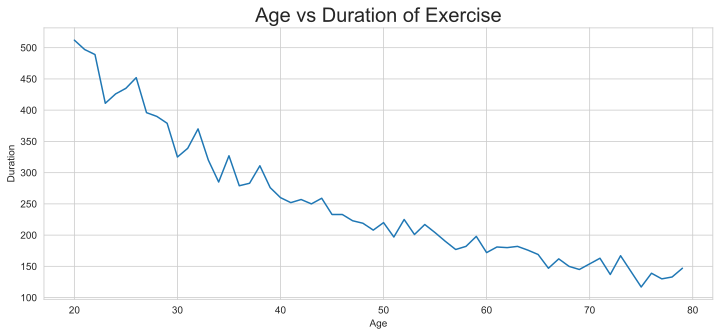

In [184]:
# Visual
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid");
plt.title('Age vs Duration of Exercise', size = 20);
sns.lineplot(x='Age', y='Duration', palette="Blues_d", data=grouped_dur);

#### 2. What are the factors that affect how high or low heart rate during a workout?

In [185]:
# Code
heart_corr = pd.DataFrame( df.corr()['Heart_Rate'] )
heart_corr

Heart_Rate
User_ID          -0.00
Age               0.01
Height            0.00
Weight            0.00
Duration          0.85
Heart_Rate        1.00
Body_Temp         0.77
Calories          0.90

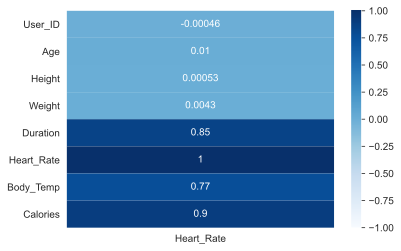

In [186]:
# Visual
sns.heatmap(heart_corr, cmap='Blues', annot=True, vmin=-1, vmax=1);

#### 3. What is the rate of burning calories compared to the time of workout?

In [187]:
# Code
duration_corr = df.Duration.corr(df.Calories)
duration_corr

0.9554205334742683

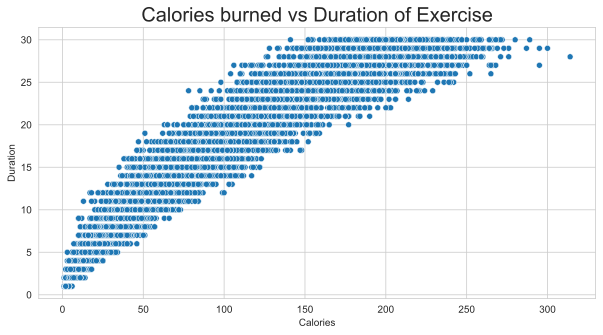

In [188]:
# Visual
plt.figure(figsize=(10,5))
plt.title('Calories burned vs Duration of Exercise', size = 20);
sns.scatterplot(data=df, x="Calories", y="Duration");

#### 4. What is the difference between male and female in the duration of workout and burned calories?

In [189]:
# Code
grouped_dur_cal = df.groupby('Gender',as_index=False)[['Duration','Calories']].mean()
grouped_dur_cal

Gender  Duration  Calories
0  female     15.50     88.15
1    male     15.56     90.95

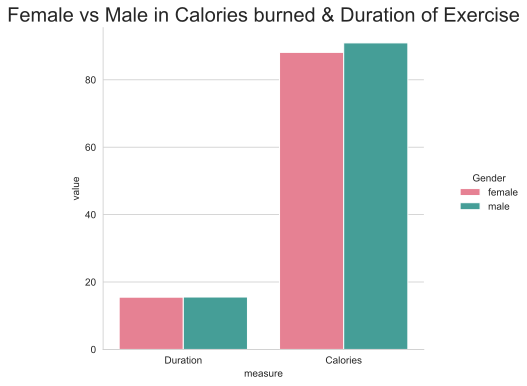

In [226]:
# Visual
reshape = {'Gender': ['female', 'female', 'male', 'male'], 'measure': ['Duration',  'Calories', 'Duration',  'Calories'], 'value':[grouped_dur_cal.values[0][1], grouped_dur_cal.values[0][2], grouped_dur_cal.values[1][1], grouped_dur_cal.values[1][2]]} 
reshape_grouped_dur_cal = pd.DataFrame(data=reshape)
reshape_grouped_dur_cal
sns.set_style("whitegrid");
sns.catplot(x='measure', y='value', hue='Gender', palette='husl',data=reshape_grouped_dur_cal, kind='bar');
plt.title('Female vs Male in Calories burned & Duration of Exercise', size = 20);

In [191]:
# Visual
sns.relplot(data=df, x="Duration", y="Calories", hue="Gender", col="Gender");

#### 5. What is the relationship between weight and burned calories?

In [192]:
# Code
df.Weight.corr(df.Calories)

0.03548058186832146

In [193]:
# Visual
sns.scatterplot(data=df, x="Weight", y="Calories", alpha=0.5);
plt.title('Calories burned vs Weight', size = 20);

#### 6. What are the oldest ages that achieve high calorie burn?


In [194]:
# Code
grouped_age = df.groupby(['Age'], as_index=False )[['Calories']].count().sort_values(ascending = False , by ='Calories')
grouped_age

Age  Calories
0    20       512
1    21       497
2    22       489
6    26       452
5    25       435
4    24       426
3    23       411
7    27       396
8    28       390
9    29       379
12   32       370
11   31       339
15   35       327
10   30       325
13   33       320
18   38       311
14   34       285
17   37       283
16   36       279
19   39       276
20   40       260
24   44       259
22   42       257
21   41       252
23   43       250
25   45       233
26   46       233
32   52       225
27   47       223
30   50       220
28   48       219
34   54       217
29   49       208
35   55       204
33   53       201
39   59       198
31   51       197
36   56       190
38   58       182
43   63       182
41   61       181
42   62       180
37   57       177
44   64       176
40   60       172
45   65       169
53   73       167
51   71       163
47   67       162
50   70       154
48   68       150
46   66       147
59   79       147
49   69       145
54   74       142
56   76       139
52   72       137
58   78       133
57   77       130
55   75       117

[None, None, None]

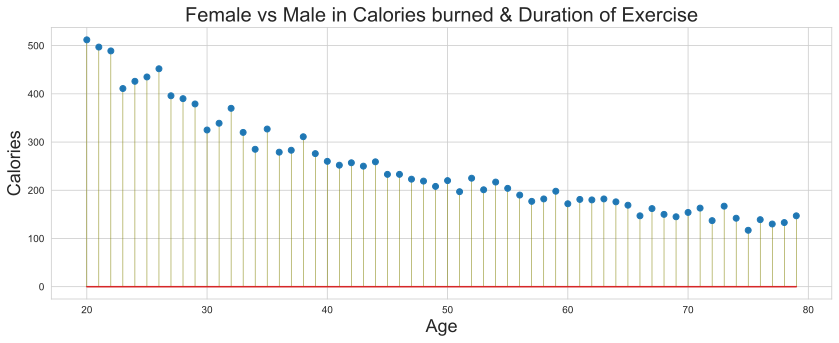

In [195]:
# Visual
plt.figure(figsize=(14, 5))
plt.title('Female vs Male in Calories burned & Duration of Exercise', size = 20);
plt.xlabel('Age', size = 18);
plt.ylabel('Calories', size = 18);
(markers, stemlines, baseline) = plt.stem(grouped_age.Age, grouped_age.Calories);
plt.setp(stemlines, linestyle="-", color="olive", linewidth=0.5 )

#### 7. What is the difference between male and female in height and weight?

In [196]:
# Code
grouped_gender = df.groupby('Gender',as_index=False)[['Height','Weight']].mean()
grouped_gender

Gender  Height  Weight
0  female  164.41   63.27
1    male  184.67   86.83

In [197]:
reshape = {'Gender': ['female', 'female', 'male', 'male'], 'measure': ['Height',  'Weight', 'Height',  'Weight'], 'value':[grouped_gender.values[0][1], grouped_gender.values[0][2], grouped_gender.values[1][1], grouped_gender.values[1][2]]} 
reshape_grouped_gender = pd.DataFrame(data=reshape)
reshape_grouped_gender

Gender measure  value
0  female  Height 164.41
1  female  Weight  63.27
2    male  Height 184.67
3    male  Weight  86.83

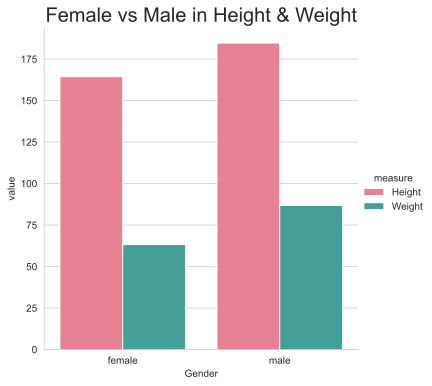

In [229]:
# Visual
sns.set_style("whitegrid")
sns.catplot(x='Gender', y='value', hue='measure', palette='husl', data=reshape_grouped_gender, kind='bar');
plt.title('Female vs Male in Height & Weight', size = 20);